###### Introduction to Network Analysis 2023/24 (iii)

## Advanced network algorithms, random graph models

You are given four networks in Pajek format.

+ Tiny toy network for testing ([toy.net](http://lovro.fri.uni-lj.si/ina/nets/toy.net))
+ Zachary karate club network ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ IMDb actors collaboration network ([collaboration_imdb.net](http://lovro.fri.uni-lj.si/ina/nets/collaboration_imdb.net))
+ A small part of Google web graph ([www_google.net](http://lovro.fri.uni-lj.si/ina/nets/www_google.net))

In [1]:
import networkx as nx
import random

### III. Erd&ouml;s-R&eacute;nyi random graphs and link indexing



1. **(discuss)** Study the following two algorithms for generating Erd&ouml;s-R&eacute;nyi random graphs $G(n,m)$ with and without link indexing ${i \choose 2}+j$, $i>j$. What is the main difference between the algorithms? What is the time complexity of the algorithms?

	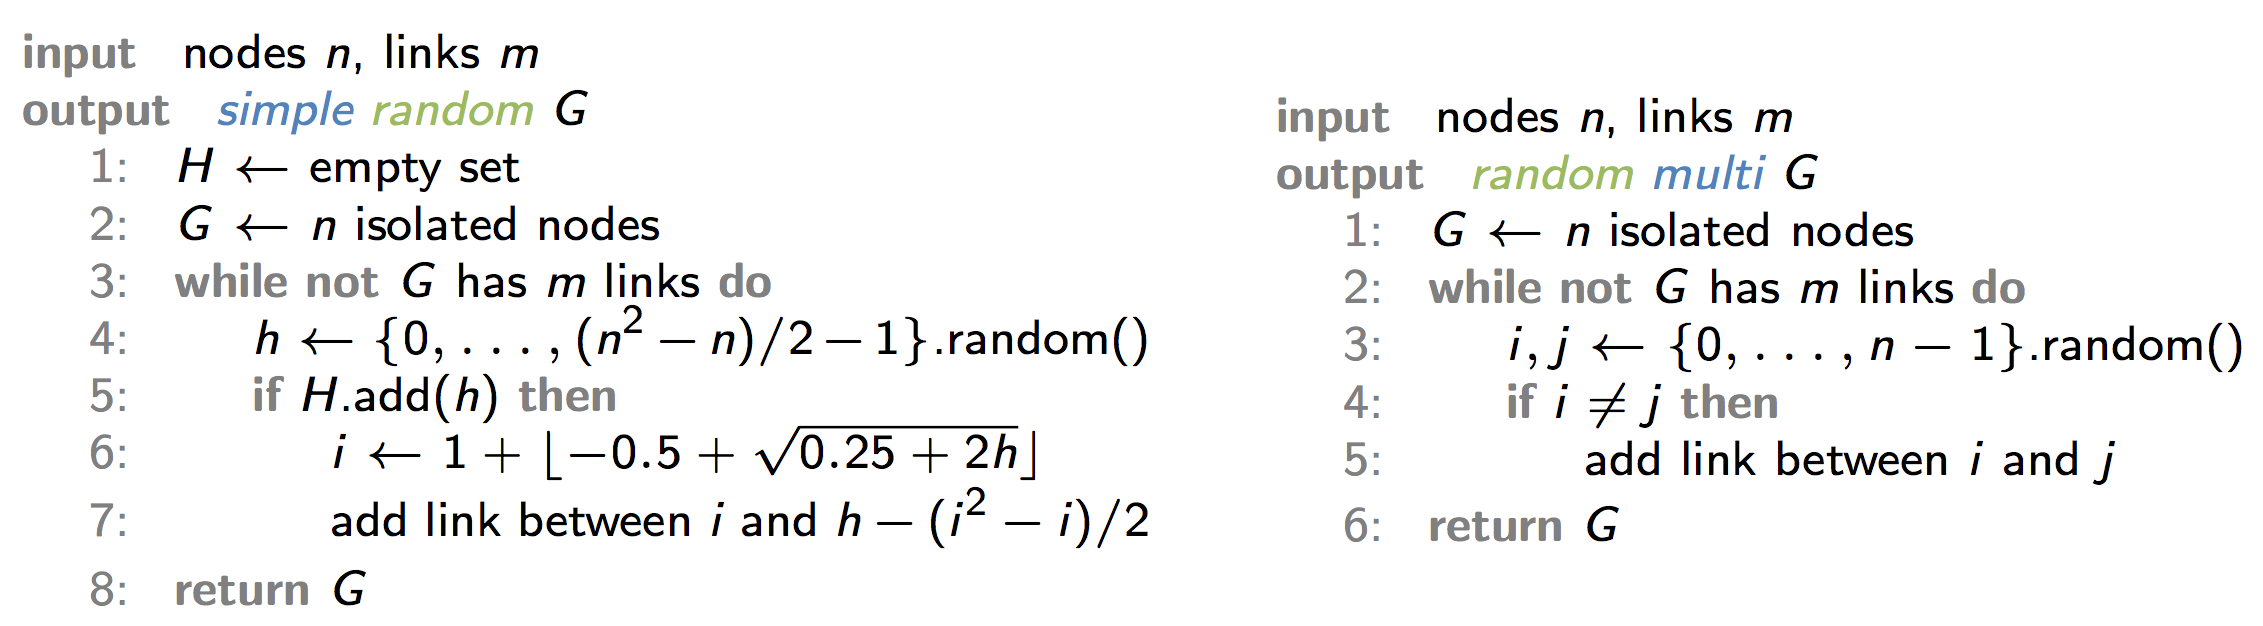



Erdős-Rényi random graph model (ER model) uses random uniform sampling to determintate the links between nodes. From the lectures, most important properties which distinct ER graphs from real world graphs are:
- substantially lower clustering coefficient,
- degrees will follow Binomial/Poison distribution,
- the distances in the graph are shorter, which gives us small diameter.

Algorithm to generate Erdős-Rényi random graph model accepts number of nodes ($n$) and edges ($m$) as argument. If we use link indexing, graph will be generated by assigning an index to each possible edge in the graph. The indexes are based on the combination ${i \choose 2} + j$, where $i$ and $j$ are the indices of the nodes. ~~It iterates through all possible edges, and for each edge, generates a random number. If the random number is below a threshold (determined by the desired edge density), the edge is added to the graph.~~ The second algorithm generates graph without explicitly using link indexing. ~~It iterates through all possible edges, and for each edge, generates a random number. If the random number is below a threshold, the edge is added to the graph.~~


Both algorithms have linear complexity, but use of node indexing is not practical due to larger numbers and need of set. Contrary algorithm without link uses only very basic logic and is much more convenient to use.

2. **(code)** Implement one of the algorithms and generate Erd&ouml;s-R&eacute;nyi random graphs corresponding to all four networks, and compute their $S$, $\langle d\rangle$ and $\langle C\rangle$. Are the results expected?

In [6]:
import utils

def erdos_renyi(n, m):
    G = nx.MultiGraph(name="erdos_renyi")
    for i in range(n):
        G.add_node(i)
    edges = []
    while len(edges) < m:
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        if i != j:
            edges.append((i, j))
    G.add_edges_from(edges)
    return G


for name in ["toy", "karate_club", "collaboration_imdb", "www_google"]:
    G = nx.Graph(utils.read_pajek(name))
    #  G = nx.convert_node_labels_to_integers(G, label_attribute = 'label')
    utils.info(G, clustering_sample=10_000)
    utils.info(erdos_renyi(G.number_of_nodes(), G.number_of_edges()), clustering_sample=10_000)

       Graph | 'toy'
       Nodes | 5 (iso=1)
       Edges | 4 (loop=0)
      Degree | 1.60 (max=3)
         LCC | 80.0% (n=2)
  Clustering | 0.4667

  MultiGraph | 'erdos_renyi'
       Nodes | 5 (iso=1)
       Edges | 4 (loop=0)
      Degree | 1.60 (max=2)
         LCC | 80.0% (n=2)
  Clustering | 0.0000

       Graph | 'karate_club'
       Nodes | 34 (iso=0)
       Edges | 78 (loop=0)
      Degree | 4.59 (max=17)
         LCC | 100.0% (n=1)
  Clustering | 0.5706

  MultiGraph | 'erdos_renyi'
       Nodes | 34 (iso=0)
       Edges | 78 (loop=0)
      Degree | 4.59 (max=10)
         LCC | 100.0% (n=1)
  Clustering | 0.1083

       Graph | 'collaboration_imdb'
       Nodes | 17,577 (iso=0)
       Edges | 287,074 (loop=0)
      Degree | 32.66 (max=784)
         LCC | 99.3% (n=19)
  Clustering | 0.3372

  MultiGraph | 'erdos_renyi'
       Nodes | 17,577 (iso=0)
       Edges | 287,074 (loop=0)
      Degree | 32.66 (max=55)
         LCC | 100.0% (n=1)
  Clustering | 0.0018

       Graph | '

Let's check if the properties discussed above/at lectures hold:
- edges are radomly uniformly distributed, ~~$S$ will be bigger than in average network,~~
- short distances and therefore lower $\langle d \rangle$,
- substantially underestimated $\langle C \rangle$

| Graph               | $S$ | $\langle d \rangle$ | $\langle C \rangle$ |
|---------------------|------------------|-------------------|-------------------|
| Toy                 | 80.0%            | 1.33              | 0.467             |
| Toy (ER)            | 100.0%           | 1.80              | 0.000             |
| Karate club         | 100.0%           | 2.41              | 0.570             |
| Karate club (ER)    | 97.1%            | 2.33              | 0.074             |
| Colaboration IMDB   | 99.3%            | 4.91              | 0.339             |
| Colaboration IMDB (ER) | 100.0%        | 3.08              | 0.002             |
| WWW Google          | 97.7%            | 6.39              | 0.514             |
| WWW Google (ER)     | 100.0%           | 6.23              | 0.000             |

The results are expected.
